In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/preprocess/')

In [ ]:
# from preprocess import *
import xgboost as xgb
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestRegressor
## import linear_model
from sklearn.linear_model import LinearRegression

import os, time, json, copy, pickle, copy
import pandas as pd
import numpy as np
from multiprocessing import Pool
from random import shuffle
from stat_ import *

1
Design TinyRocket ...
Training ...
(166, 24) (166, 1)
Testing ...
R:  0.999
MAPE:  3
RRSE:  0.036
MAE:  0.015
Coverage: 95.0%


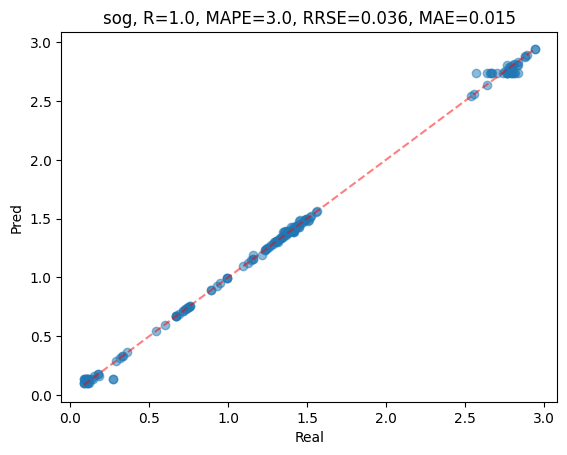

R: 0.999
MAPE: 3
RRSE: 0.036
MAE: 0.015
Coverage: 95.0
Total Slack Prediction: 229.09930419921875
Total Slack Real: 229.09929170267174


BOG (sog) Design Average
Average R: 0.999
Average MAPE: 3.0
Average RRSE: 0.036
Average MAE: 0.015
Average Coverage: 95.0

TNS
MAPE:  0
RRSE:  1.0
MAE:  0.0
MAPE:  0
RRSE:  1.0
MAE:  0.0


<Figure size 640x480 with 0 Axes>

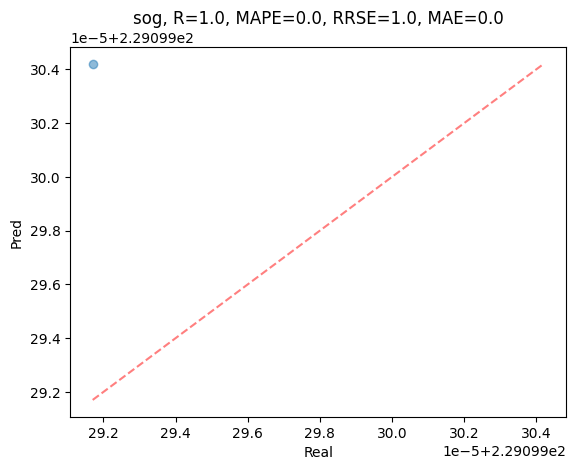

R:  0.999
MAPE:  3
RRSE:  0.036
MAE:  0.015


<Figure size 640x480 with 0 Axes>

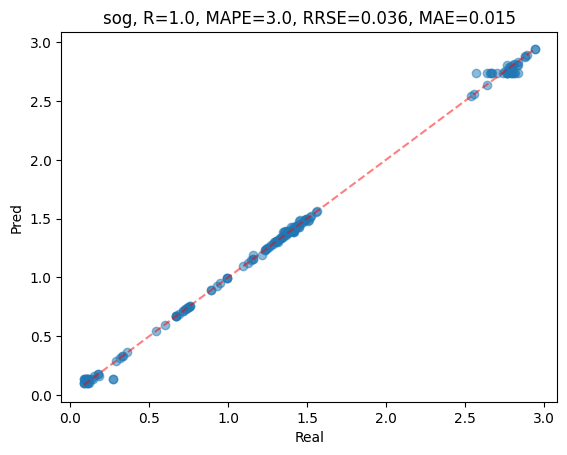

1
Design TinyRocket ...
Training ...
(166, 24) (166, 1)
Testing ...
R:  1.0
MAPE:  2
RRSE:  0.026
MAE:  0.009
Coverage: 98.0%


<Figure size 640x480 with 0 Axes>

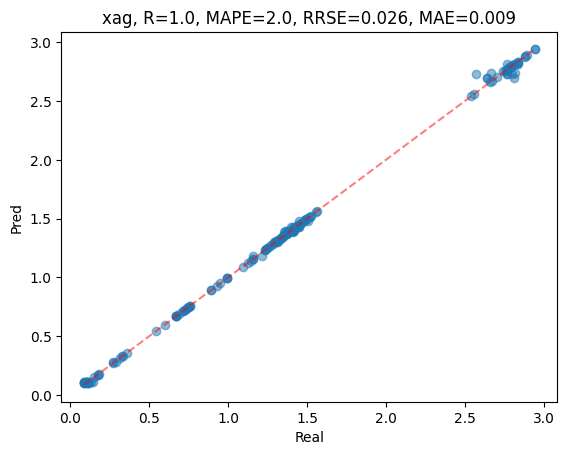

R: 1.0
MAPE: 2
RRSE: 0.026
MAE: 0.009
Coverage: 98.0
Total Slack Prediction: 229.09930419921875
Total Slack Real: 229.09929170267174


BOG (xag) Design Average
Average R: 1.0
Average MAPE: 2.0
Average RRSE: 0.026
Average MAE: 0.009
Average Coverage: 98.0

TNS
MAPE:  0
RRSE:  1.0
MAE:  0.0
MAPE:  0
RRSE:  1.0
MAE:  0.0


<Figure size 640x480 with 0 Axes>

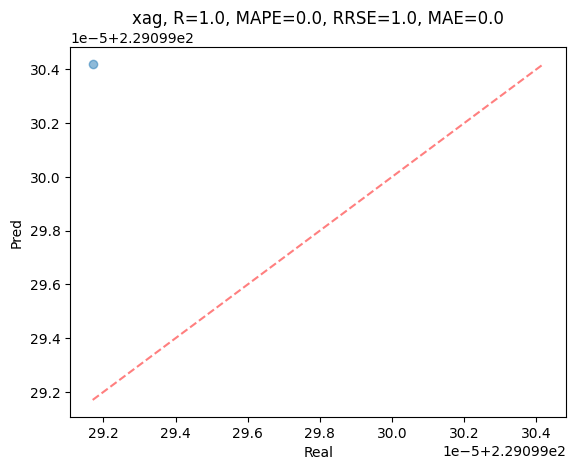

R:  1.0
MAPE:  2
RRSE:  0.026
MAE:  0.009


<Figure size 640x480 with 0 Axes>

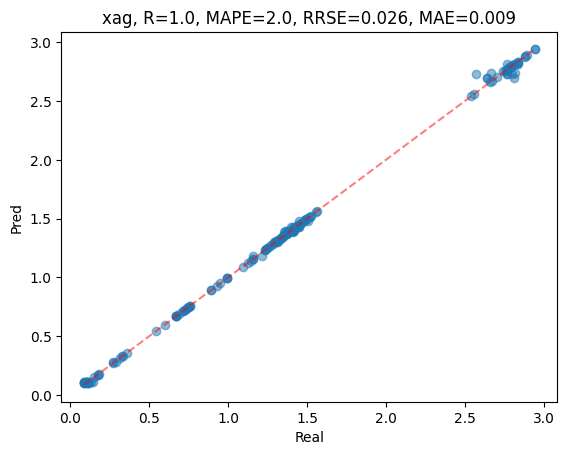

1
Design TinyRocket ...
Training ...
(166, 24) (166, 1)
Testing ...
R:  1.0
MAPE:  2
RRSE:  0.026
MAE:  0.01
Coverage: 98.0%


<Figure size 640x480 with 0 Axes>

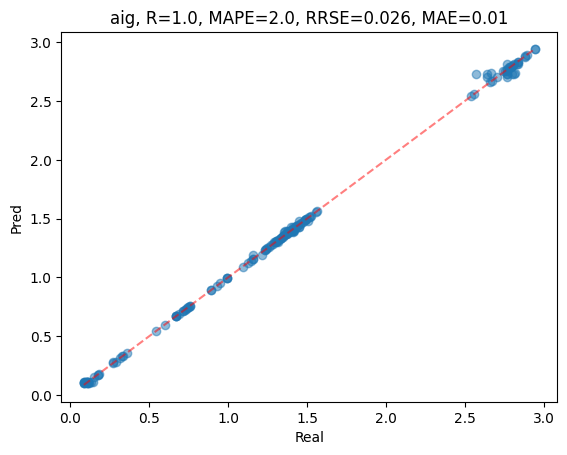

R: 1.0
MAPE: 2
RRSE: 0.026
MAE: 0.01
Coverage: 98.0
Total Slack Prediction: 229.09930419921875
Total Slack Real: 229.09929170267174


BOG (aig) Design Average
Average R: 1.0
Average MAPE: 2.0
Average RRSE: 0.026
Average MAE: 0.01
Average Coverage: 98.0

TNS
MAPE:  0
RRSE:  1.0
MAE:  0.0
MAPE:  0
RRSE:  1.0
MAE:  0.0


<Figure size 640x480 with 0 Axes>

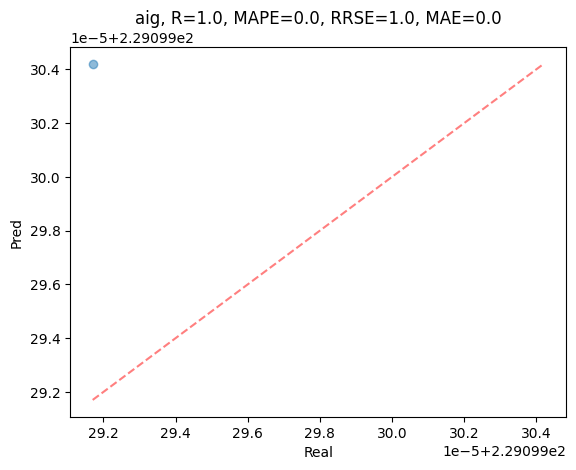

R:  1.0
MAPE:  2
RRSE:  0.026
MAE:  0.01


<Figure size 640x480 with 0 Axes>

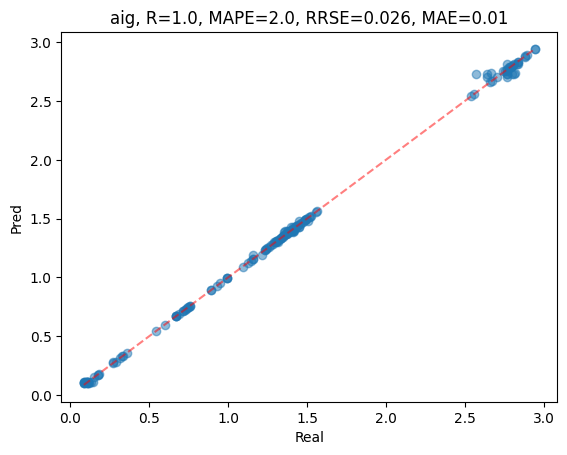

1
Design TinyRocket ...
Training ...
(166, 24) (166, 1)
Testing ...
R:  0.999
MAPE:  4
RRSE:  0.038
MAE:  0.016
Coverage: 95.0%


<Figure size 640x480 with 0 Axes>

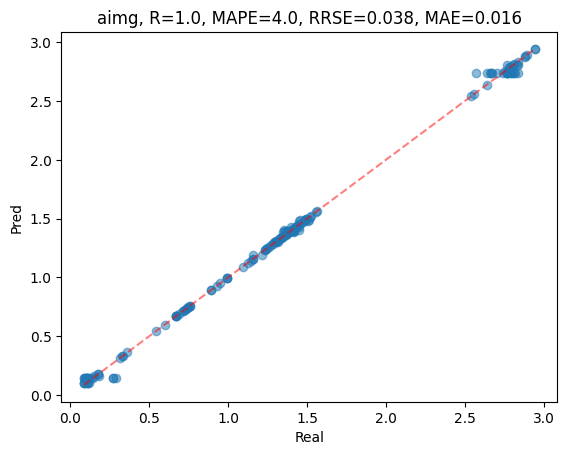

R: 0.999
MAPE: 4
RRSE: 0.038
MAE: 0.016
Coverage: 95.0
Total Slack Prediction: 229.09930419921875
Total Slack Real: 229.09929170267174


BOG (aimg) Design Average
Average R: 0.999
Average MAPE: 4.0
Average RRSE: 0.038
Average MAE: 0.016
Average Coverage: 95.0

TNS
MAPE:  0
RRSE:  1.0
MAE:  0.0
MAPE:  0
RRSE:  1.0
MAE:  0.0


<Figure size 640x480 with 0 Axes>

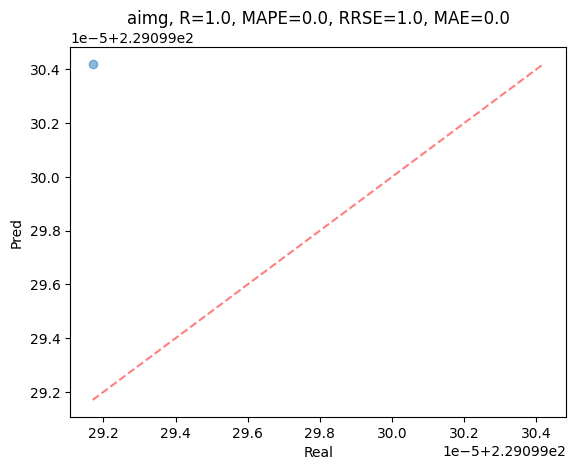

R:  0.999
MAPE:  4
RRSE:  0.038
MAE:  0.016


<Figure size 640x480 with 0 Axes>

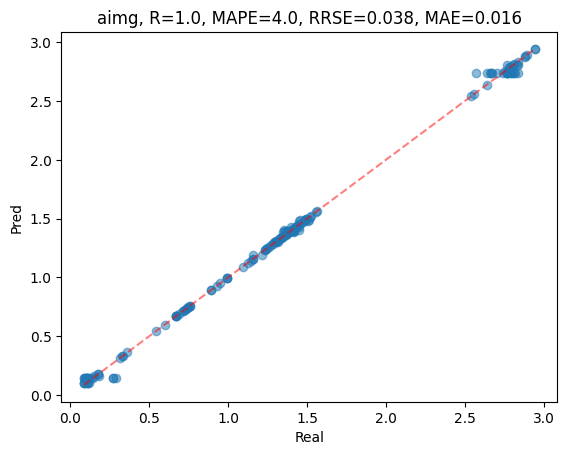

<Figure size 640x480 with 0 Axes>

In [10]:
def testing(design_name, xgbr):
    feat_label_dir = "/content/drive/MyDrive/preprocess/feat_label_timing"


    feat_vec, label_vec = [], []
    reg_lst = []
    with open (f"{feat_label_dir}/{design_name}_{cmd}{label_cmd}.pkl", "rb") as f:
        feat_label_design = pickle.load(f)
    for reg_dct in feat_label_design:
        feat = []
        feat.extend(reg_dct[f'feat_design'])
        feat.extend(reg_dct[f'feat_path'])
        feat_vec.append(feat)
        label_vec.append(reg_dct[f"label_slack"])
        reg_lst.append(reg_dct['name'])
    feat_arr = np.array(feat_vec)
    label_arr = np.array(label_vec)

    df_feat = pd.DataFrame(feat_arr)
    df_label = pd.DataFrame(label_arr)
    # print(df_feat)
    # print(df_label)
    # input()
    pred = xgbr.predict(df_feat).flatten()



    r_val, mape_val, rrse_val, mae_val  = regression_metrics(pred, label_arr)
    cover_val = coverage(pred, label_arr, reg_lst, k=4)
    if not os.path.exists(f"./fig/{cmd}{label_cmd}_design"):
        os.makedirs(f"./fig/{cmd}{label_cmd}_design")
    draw_scatter_plot(pred, label_arr, f"./fig/{cmd}{label_cmd}_design/{design_name}.png", title=f"{cmd}, R={round(np.mean(r_val), 2)}, MAPE={round(np.mean(mape_val), 1)}, RRSE={round(np.mean(rrse_val), 3)}, MAE={round(np.mean(mae_val), 3)}")


    if np.isnan(r_val):
        r_val = 1

    total_slack_pred = np.sum(pred)
    total_slack_real = np.sum(label_arr)

    pred_lst.append(total_slack_pred)
    real_lst.append(total_slack_real)
    pred_module_lst.extend(pred.tolist())
    real_module_lst.extend(label_arr.tolist())

    return r_val, mape_val, rrse_val, mae_val, total_slack_pred, total_slack_real, cover_val



def training(train_lst):
    feat_label_dir = "/content/drive/MyDrive/preprocess/feat_label_timing"
    feat_vec, label_vec = [], []
    for design_name in train_lst:
        # feat_vec, label_vec = [], []
        with open (f"{feat_label_dir}/{design_name}_{cmd}{label_cmd}.pkl", "rb") as f:
            feat_label_design = pickle.load(f)
        for reg_dct in feat_label_design:
            feat = []
            feat.extend(reg_dct[f'feat_design'])
            feat.extend(reg_dct[f'feat_path'])
            # print(len(feat))

            feat_vec.append(feat)
            label_vec.append(reg_dct[f"label_slack"])

    feat_arr = np.array(feat_vec)
    label_arr = np.array(label_vec)

    feat_arr = np.array(feat_vec)
    label_arr = np.array(label_vec)

    df_feat = pd.DataFrame(feat_arr)
    df_label = pd.DataFrame(label_arr)
    print(df_feat.shape, df_label.shape)

    xgbr = xgb.XGBRegressor(n_estimators=500, max_depth=50, nthread=25)
    xgbr.fit(df_feat, df_label)

    return xgbr


def k_fold(design_lst):

    r_lst, mape_lst, rrse_lst, mae_lst = [], [], [], []
    total_pwr_pred_lst, total_pwr_real_lst = [], []
    cover_lst = []

    print(len(design_lst))




    for design in design_lst:
        print(f"Design {design} ...")
        ## rest_lst = copy.deepcopy(design_lst)
        rest_lst = design_lst.copy()
        #rest_lst.remove(design)
        print(f"Training ...")
        xgbr = training(rest_lst)
        print(f"Testing ...")
        r_val, mape_val, rrse_val, mae_val, total_pwr_pred, total_pwr_real, cover_val = testing(design, xgbr)
        print(f"R: {r_val}")
        print(f"MAPE: {mape_val}")
        print(f"RRSE: {rrse_val}")
        print(f"MAE: {mae_val}")
        print(f"Coverage: {cover_val}")
        print(f"Total Slack Prediction: {total_pwr_pred}")
        print(f"Total Slack Real: {total_pwr_real}")
        r_lst.append(r_val)
        mape_lst.append(mape_val)
        rrse_lst.append(rrse_val)
        mae_lst.append(mae_val)
        total_pwr_pred_lst.append(total_pwr_pred)
        total_pwr_real_lst.append(total_pwr_real)
        cover_lst.append(cover_val)
        print('\n')

    print(f"BOG ({cmd}) Design Average")
    print(f"Average R: {round(np.mean(r_lst), 4)}")
    print(f"Average MAPE: {round(np.mean(mape_lst), 4)}")
    print(f"Average RRSE: {round(np.mean(rrse_lst), 4)}")
    print(f"Average MAE: {round(np.mean(mae_lst), 4)}")
    print(f"Average Coverage: {round(np.mean(cover_lst), 4)}")

    print(f"\nTNS")
    r_val, mape_val, rrse_val, mape_val = regression_metrics(total_pwr_pred_lst, total_pwr_real_lst)

    ## save powr list



if __name__ == '__main__':


    ## ========= change the power type here =========
    global cmd, label_cmd

    ## ------ 1. BOG type (default: SOG) ------
    cmd = 'sog'
    # cmd = "xag"
    # cmd = "aig"
    # cmd = "aimg"

    ## ------ 2. label stage (init: bit-level post-syn, route: bit-level post-layout) ------
    ## ------ (init_word: signal-level post-syn, route_word: signal-level post-layout) ------
    # label_cmd = "_init"
    # label_cmd = "_route"
    # label_cmd = "_init_word"
    label_cmd = "_route_word"

    #with open ("./design_js/design_lst.json", "r") as f:
        #design_lst = json.load(f)
    design_lst = ["TinyRocket"]

    for cmd in ["sog", "xag", "aig", "aimg"]:
        global pred_lst, real_lst, pred_module_lst, real_module_lst
        pred_lst, real_lst, pred_module_lst, real_module_lst = [], [], [], []
        k_fold(design_lst)
        if not os.path.exists(f"./fig/{cmd}{label_cmd}"):
            os.makedirs(f"./fig/{cmd}{label_cmd}")
        r_val, mape_val, rrse_val, mae_val  = regression_metrics(pred_lst, real_lst)
        draw_scatter_plot(pred_lst, real_lst, f"./fig/{cmd}{label_cmd}/{cmd}{label_cmd}.png", title=f"{cmd}, R={round(np.mean(r_val), 2)}, MAPE={round(np.mean(mape_val), 1)}, RRSE={round(np.mean(rrse_val), 3)}, MAE={round(np.mean(mae_val), 3)}")

        r_val, mape_val, rrse_val, mae_val  = regression_metrics(pred_module_lst, real_module_lst)
        draw_scatter_plot(pred_module_lst, real_module_lst, f"./fig/{cmd}{label_cmd}/{cmd}_module{label_cmd}.png", title=f"{cmd}, R={round(np.mean(r_val), 2)}, MAPE={round(np.mean(mape_val), 1)}, RRSE={round(np.mean(rrse_val), 3)}, MAE={round(np.mean(mae_val), 3)}")